In [1]:
from PIL import Image
import fiftyone.zoo as foz
import fiftyone as fo
from ImageObjectExtractor import ImageObjectExtractor
from utils import get_image
from ImageWithTransplantedObjects import ImageWithTransplantedObjects
from ExtractedObject import ExtractedObject
import os

importing dataset
Found annotations at 'C:\Users\sophi\fiftyone\coco-2017\raw\instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-20'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
extracting objects


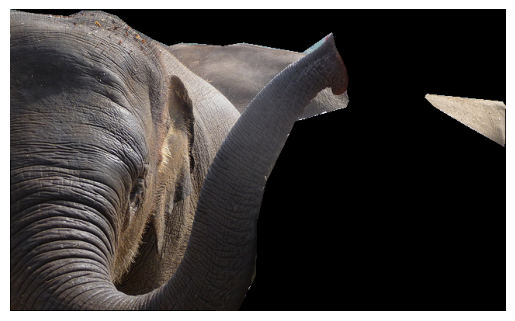

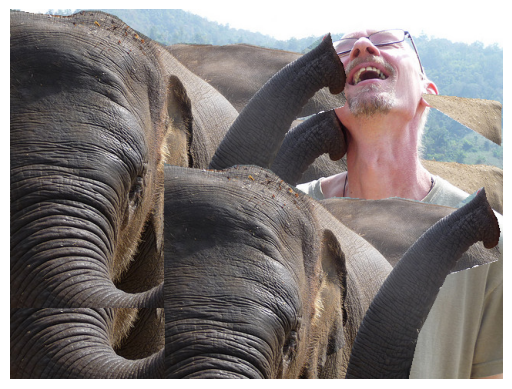

In [2]:
save_location = 'transplantation/outputs'
print("importing dataset")
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["segmentations"],
    max_samples = 20,
    classes= 'elephant'
)
dataset.persistent = True

sample = dataset.first()
obj_extract = ImageObjectExtractor(sample, save_location=save_location)
print("extracting objects")
obj_extract.extract_objects()

original_image_path = sample.filepath
img = Image.open(original_image_path)
new_image = ImageWithTransplantedObjects(img, sample.id, save_location)
obj = ExtractedObject()
obj.load_object(os.path.join(save_location, f'extracted_objects/elephant_{sample.id}.pkl'))
obj.display_extracted_object()
new_image.add_transplanted_object(obj, (0,0))
new_image.add_transplanted_object(obj, (200, 200))
new_image.display_transplanted_image()
new_image.save_transplanted_image()